$$ ITI \space AI-Pro: \space Intake \space 45 $$
$$ Recommender \space Systems $$
$$ Lab \space no. \space 4 $$

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Check if GPU is available and set device accordingly


In [1]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")  
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")  
    print("Using CPU")

print(f"CUDA Version: {torch.version.cuda}")
print(f"PyTorch Version: {torch.__version__}")
print(f"cuDNN Enabled: {torch.backends.cudnn.enabled}")


Using GPU: NVIDIA GeForce MX130
CUDA Version: 12.4
PyTorch Version: 2.6.0+cu124
cuDNN Enabled: True


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## 1. Tensors - The Fundamental Data Structure in PyTorch

# Creating tensors

In [3]:
# From Python lists
tensor_from_list = torch.tensor([1, 2, 3, 4, 5])
print(f'tensor_from_list:\n {tensor_from_list}')

# From NumPy arrays
np_array = np.array([1, 2, 3, 4, 5])
tensor_from_numpy = torch.from_numpy(np_array)
print(f'\ntensor_from_numpy:\n {tensor_from_numpy}')

# Tensor with specific data type (float32, float64)
tensor_float32 = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float32)
print(f'\ntensor_float32:\n {tensor_float32}')
tensor_float64 = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float64)
print(f'tensor_float64:\n {tensor_float64}')

# Creating tensors with specific shapes
zeros_tensor = torch.zeros((3, 4))    
print(f'\nzeros_tensor:\n {zeros_tensor}')
random_tensor = torch.rand((3, 4))  
print(f'random_tensor:\n {random_tensor}')
identity_matrix = torch.eye(3)  
print(f'identity_matrix:\n {identity_matrix}')
range_tensor = torch.arange(0, 11, 2)  
print(f'range_tensor:\n {range_tensor}')
linspace_tensor = torch.linspace(0, 1, steps=5)  
print(f'linspace_tensor:\n {linspace_tensor}')

tensor_from_list:
 tensor([1, 2, 3, 4, 5])

tensor_from_numpy:
 tensor([1, 2, 3, 4, 5])

tensor_float32:
 tensor([1., 2., 3., 4., 5.])
tensor_float64:
 tensor([1., 2., 3., 4., 5.], dtype=torch.float64)

zeros_tensor:
 tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
random_tensor:
 tensor([[0.0676, 0.8340, 0.3412, 0.6605],
        [0.6245, 0.8877, 0.2366, 0.0531],
        [0.5842, 0.0786, 0.2252, 0.5496]])
identity_matrix:
 tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
range_tensor:
 tensor([ 0,  2,  4,  6,  8, 10])
linspace_tensor:
 tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])


# Tensor operations


In [4]:
# Adding, multiplication
tensor_a = torch.tensor([[1, 2], [3, 4]])
tensor_b = torch.tensor([[5, 6], [7, 8]])

sum_tensor = tensor_a + tensor_b
print(f'sum_tensor:\n{sum_tensor}')

mul_tensor = tensor_a * tensor_b
print(f'\nmul_tensor:\n{mul_tensor}')

matmul_tensor = torch.matmul(tensor_a, tensor_b)
print(f'\nmatmul_tensor:\n{matmul_tensor}')

# Reshaping tensors
tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])

reshaped_tensor = tensor.reshape(3, 2)
print(f'\n\nreshaped_tensor:\n{reshaped_tensor}')

flattened_tensor = tensor.view(-1)
print(f'\nflattened_tensor:\n{flattened_tensor}')

# Moving tensors to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'\n\ndevice:\n{device}')
tensor_gpu = tensor.to(device)
print(f'\ntensor_gpu:\n{tensor_gpu}')

sum_tensor:
tensor([[ 6,  8],
        [10, 12]])

mul_tensor:
tensor([[ 5, 12],
        [21, 32]])

matmul_tensor:
tensor([[19, 22],
        [43, 50]])


reshaped_tensor:
tensor([[1, 2],
        [3, 4],
        [5, 6]])

flattened_tensor:
tensor([1, 2, 3, 4, 5, 6])


device:
cuda

tensor_gpu:
tensor([[1, 2, 3],
        [4, 5, 6]], device='cuda:0')


## 2. Autograd - Automatic Differentiation

In [5]:
# Creating tensors with gradient tracking
x = torch.tensor(2.0, requires_grad=True)
print(f'x:\n{x}')

# Computing gradients
y = x**2
print(f'\n\ny(x**2):\n{y}')
y.backward()
print(f'\nGradient of x (dy/dx):\n{x.grad}')

# Example of gradient accumulation and zeroing
x.grad = None  
y = x**3  
y.backward()
print(f'\n\ny(x**3):\n{y}')
print(f'\nGradient after first backward:\n{x.grad}')
# Gradient will accumulate if we don't zero it
y = x**4 
print(f'\ny(x**4):\n{y}') 
y.backward()
print(f'\nGradient after second backward (accumulated,without zeroing):\n{x.grad}')

# Zero the gradient and compute again
x.grad.zero_()
y = x**2  
y.backward()
print(f'\nGradient after zeroing:\n{x.grad}')

x:
2.0


y(x**2):
4.0

Gradient of x (dy/dx):
4.0


y(x**3):
8.0

Gradient after first backward:
12.0

y(x**4):
16.0

Gradient after second backward (accumulated,without zeroing):
44.0

Gradient after zeroing:
4.0


## 3. Neural Networks with nn.Module


In [6]:
# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN,self).__init__()
        self.fc1 = nn.Linear(3,5)
        self.fc2 = nn.Linear(5,1)
        self.relu = nn.ReLU()
    def forward(self,x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
print(f'\nSimpleNN class defined successfully!')

# Create a model instance
model = SimpleNN()
print(f'\nModel Architecture:\n{model}')

# Random input
input_tensor = torch.rand(1,3)
print(f'\nRandom input tensor:\n{input_tensor}')

# Forward pass
output = model(input_tensor)
print(f'\nOutput after forward pass:\n{output}\n')

# Access model parameters, print them
# Print model parameters
for name, param in model.named_parameters():
    print(f'Parameter - {name}:\n{param}')


SimpleNN class defined successfully!

Model Architecture:
SimpleNN(
  (fc1): Linear(in_features=3, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=1, bias=True)
  (relu): ReLU()
)

Random input tensor:
tensor([[0.7308, 0.3964, 0.9817]])

Output after forward pass:
tensor([[-0.2799]], grad_fn=<AddmmBackward0>)

Parameter - fc1.weight:
Parameter containing:
tensor([[ 0.2715, -0.4179, -0.3174],
        [ 0.5139, -0.0734,  0.2406],
        [-0.0659, -0.3530,  0.3819],
        [ 0.3367,  0.5041, -0.1733],
        [ 0.5425, -0.4054, -0.3593]], requires_grad=True)
Parameter - fc1.bias:
Parameter containing:
tensor([ 0.5190, -0.5702,  0.3484, -0.4992,  0.5218], requires_grad=True)
Parameter - fc2.weight:
Parameter containing:
tensor([[ 0.2617, -0.4249, -0.4001, -0.0035, -0.2430]], requires_grad=True)
Parameter - fc2.bias:
Parameter containing:
tensor([-0.0249], requires_grad=True)


## 4. Loss Functions and Optimizers

x (input data):
tensor([[0.0936],
        [0.9975],
        [0.5761],
        [0.4847],
        [0.2713]])
y (target labels):
tensor([[2.3987],
        [4.9545],
        [3.8583],
        [3.5637],
        [2.8048]])
Model Architecture:
LinearRegressionModel(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
)
Epoch 1, Loss: 6.5592
Epoch 2, Loss: 6.2418
Epoch 3, Loss: 5.9402
Epoch 4, Loss: 5.6536
Epoch 5, Loss: 5.3811
Epoch 6, Loss: 5.1222
Epoch 7, Loss: 4.8761
Epoch 8, Loss: 4.6423
Epoch 9, Loss: 4.4200
Epoch 10, Loss: 4.2088
Epoch 11, Loss: 4.0080
Epoch 12, Loss: 3.8172
Epoch 13, Loss: 3.6359
Epoch 14, Loss: 3.4636
Epoch 15, Loss: 3.2998
Epoch 16, Loss: 3.1441
Epoch 17, Loss: 2.9961
Epoch 18, Loss: 2.8555
Epoch 19, Loss: 2.7218
Epoch 20, Loss: 2.5948
Epoch 21, Loss: 2.4741
Epoch 22, Loss: 2.3593
Epoch 23, Loss: 2.2502
Epoch 24, Loss: 2.1466
Epoch 25, Loss: 2.0480
Epoch 26, Loss: 1.9544
Epoch 27, Loss: 1.8653
Epoch 28, Loss: 1.7807
Epoch 29, Loss: 1.7003
Epoch 30, Loss: 1.6238

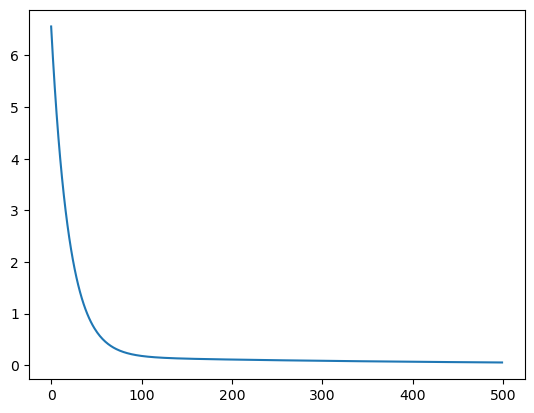

In [7]:
# Create some dummy data
x = torch.rand(100,1)
y = 3 * x + 2 + 0.1 * torch.randn(100, 1)
print(f'x (input data):\n{x[:5]}')
print(f'y (target labels):\n{y[:5]}')

# Create a model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel,self).__init__()
        self.fc1 = nn.Linear(1,1)
    def forward(self,x):
        x = self.fc1(x)
        return x

model = LinearRegressionModel()
print(f'Model Architecture:\n{model}')

# Define loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

# Train for 5 epochs
epochs = 500
losses = []
for epoch in range(epochs):
    y_pred = model(x)
    loss = loss_fn(y_pred,y)
    optimizer.zero_grad()
    loss.backward()
    losses.append(loss.detach())
    optimizer.step()
    
    print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')

plt.plot(losses)

## 5. Datasets and DataLoaders


Transformations defined successfully!

MNIST dataset loaded successfully!
DataLoaders created successfully!
Function to display images defined successfully!


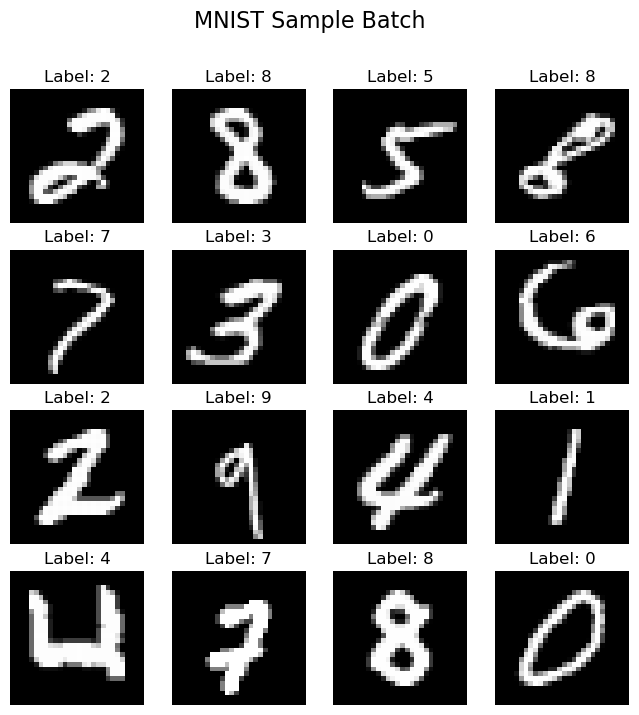

In [8]:
# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize to range [-1, 1]
])
print(f'Transformations defined successfully!\n')


# Load MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
print(f'MNIST dataset loaded successfully!')

# Create DataLoaders
from torch.utils.data import DataLoader
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)
print(f'DataLoaders created successfully!')

# Visualize a batch of data
# Function to display images
def show_images(images, labels, num_images=16):
    images = images[:num_images]  # Select first 'num_images'
    labels = labels[:num_images]
    
    fig, axes = plt.subplots(4, 4, figsize=(8, 8))  # Create a 4x4 grid
    fig.suptitle("MNIST Sample Batch", fontsize=16)

    for i, ax in enumerate(axes.flat):
        img = images[i].squeeze().numpy()  # Remove extra dimensions
        ax.imshow(img, cmap='gray')  # Display image in grayscale
        ax.set_title(f'Label: {labels[i].item()}')
        ax.axis('off')

    plt.show()

print(f'Function to display images defined successfully!')

# Display a batch of images
# Get one batch of images
images, labels = next(iter(train_loader))

# Show batch of images
show_images(images, labels)


## 6. Convolutional Neural Networks (CNNs)


In [9]:
# Define a CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)  # 1 input channel (grayscale), 16 filters
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)  # 32 filters

        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(32 * 7 * 7, 128)  # Flattened size (32 filters * 7x7)
        self.fc2 = nn.Linear(128, 10)  # 10 output classes (digits 0-9)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Conv -> ReLU -> Pool
        x = self.pool(F.relu(self.conv2(x)))  # Conv -> ReLU -> Pool
        x = torch.flatten(x, start_dim=1)  # Flatten before FC layers
        x = F.relu(self.fc1(x))  # FC layer with ReLU
        x = self.fc2(x)  # Output layer
        return x

print(f'CNN Model class defined successfully!')

# Create a CNN model
model = SimpleCNN()
print(f'Model Architecture:\n{model}')

CNN Model class defined successfully!
Model Architecture:
SimpleCNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


## 7. Training a CNN on MNIST


In [10]:
# Move model to device (GPU if available)
# Check if GPU is available and # Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')
model.to(device)

# Define loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
print(f'Loss function and optimizer initialized!')

# Train function
def train(model, train_loader, loss_fn, optimizer, epochs=5):
    model.train()  # Set model to training mode

    for epoch in range(epochs):
        total_loss = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)  # Move to GPU if available

            # Forward pass
            outputs = model(images)
            loss = loss_fn(outputs, labels)

            # Backward pass
            optimizer.zero_grad()  # Zero gradients
            loss.backward()  # Compute gradients
            optimizer.step()  # Update weights

            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}')
    
    print('Training complete!')

print(f'Training function defined successfully!')
train(model, train_loader, loss_fn, optimizer, epochs=5)

Using device: cuda
Loss function and optimizer initialized!
Training function defined successfully!
Epoch [1/5], Loss: 0.2064
Epoch [2/5], Loss: 0.0539
Epoch [3/5], Loss: 0.0369
Epoch [4/5], Loss: 0.0297
Epoch [5/5], Loss: 0.0234
Training complete!


## 8. Evaluating the Model


In [11]:
def evaluate(model, test_loader):
    model.eval()  
    correct = 0
    total = 0

    with torch.no_grad():  # Disable gradient computation
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)  # Move to GPU if available

            # Forward pass
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)  # Get the class with highest probability
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')

print(f'Evaluation function defined successfully!')
evaluate(model, test_loader)


Evaluation function defined successfully!
Test Accuracy: 98.96%


## 9. Saving and Loading Models


In [12]:
# Save model
torch.save(model.state_dict(), 'cnn_model.pth')
print('\nModel (parameters) saved successfully!')
torch.save(model, 'cnn_model_full.pth')
print('Full model saved successfully!')

# Load model
model1 = SimpleCNN()
model1.load_state_dict(torch.load('cnn_model.pth'))
model1.to(device)
print('\nModel (parameters) loaded successfully!')

model2 = SimpleCNN()
model2 = torch.load('cnn_model_full.pth', weights_only=False)
model2.to(device)
print('Full model loaded successfully!')


Model (parameters) saved successfully!
Full model saved successfully!

Model (parameters) loaded successfully!
Full model loaded successfully!


## 10. Transfer Learning


In [13]:
# Define a new model based on a pre-trained network
model = torchvision.models.resnet18(pretrained=True)   # Load pre-trained ResNet18
print(f'Original Model:\n{model}')

# Create transfer learning model
num_classes = 10
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
model.fc = nn.Linear(model.fc.in_features, num_classes)
                                        # Replace with new FC layer 
                                        # Since ResNet18 was trained on ImageNet (1000 classes), 
                                        # we replace the last fully connected (FC) layer with one suited 
                                        # for MNIST (10 classes).

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(f'Modified Model for MNIST:\n{model}')


/home/shouaib/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shouaib/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Original Model:
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(

In [14]:
loss_fn = nn.CrossEntropyLoss()

# Define optimizer (only train the modified classifier layer)
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

print(f'Loss function and optimizer defined!')

def train_transfer_learning(model, train_loader, loss_fn, optimizer, epochs=5):
    model.train()  # Set model to training mode

    for epoch in range(epochs):
        total_loss = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)  # Move to GPU if available

            # Forward pass
            outputs = model(images)
            loss = loss_fn(outputs, labels)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}')
    
    print('Transfer learning training complete!')

print(f'Training function for transfer learning defined!')
train_transfer_learning(model, train_loader, loss_fn, optimizer, epochs=5)


Loss function and optimizer defined!
Training function for transfer learning defined!
Epoch [1/5], Loss: 1.4985
Epoch [2/5], Loss: 1.3555
Epoch [3/5], Loss: 1.3240
Epoch [4/5], Loss: 1.3131
Epoch [5/5], Loss: 1.3124
Transfer learning training complete!


## 11. Advanced Techniques: Learning Rate Scheduler



In [16]:
# Define a learning rate scheduler
optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.001)
# Define learning rate scheduler (decrease LR by 0.1 every 5 epochs)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
print(f'Learning Rate Scheduler Defined!')

# Simulate training for 10 epochs
def train_with_scheduler(model, train_loader, loss_fn, optimizer, scheduler, epochs=10):
    model.train()

    for epoch in range(epochs):
        total_loss = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = loss_fn(outputs, labels)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        # Step the scheduler
        scheduler.step()

        current_lr = optimizer.param_groups[0]['lr']
        avg_loss = total_loss / len(train_loader)

        print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}, LR: {current_lr:.6f}')
    
    print('Training with Learning Rate Scheduler Complete!')

print(f'Training function with scheduler defined!')
train_with_scheduler(model, train_loader, loss_fn, optimizer, scheduler, epochs=10)


Learning Rate Scheduler Defined!
Training function with scheduler defined!
Epoch [1/10], Loss: 1.3083, LR: 0.001000
Epoch [2/10], Loss: 1.3030, LR: 0.001000
Epoch [3/10], Loss: 1.3061, LR: 0.001000
Epoch [4/10], Loss: 1.3018, LR: 0.001000
Epoch [5/10], Loss: 1.3025, LR: 0.000500
Epoch [6/10], Loss: 1.2798, LR: 0.000500
Epoch [7/10], Loss: 1.2805, LR: 0.000500
Epoch [8/10], Loss: 1.2785, LR: 0.000500
Epoch [9/10], Loss: 1.2688, LR: 0.000500
Epoch [10/10], Loss: 1.2724, LR: 0.000250
Training with Learning Rate Scheduler Complete!


## 12. Custom Datasets
  


In [ ]:
import torch
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        label = self.labels[idx]
        
        if self.transform:
            sample = self.transform(sample)  # Apply transformation if specified

        return sample, label

# Example usage:
data = torch.randn(100, 3, 32, 32)  # Example 100 images (3x32x32)
labels = torch.randint(0, 10, (100,))  # Example labels (0-9 classes)

dataset = CustomDataset(data, labels)

# Access an item
sample, label = dataset[0]
print("\nCustom Dataset:")
print(f"Dataset size: {len(dataset)}\n\n")

dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

for batch in dataloader:
    images, labels = batch
    print(images.shape, labels.shape)

print(f"\nBatch size: {next(iter(dataloader))[0].shape}")


Custom Dataset:
Dataset size: 100


torch.Size([16, 3, 32, 32]) torch.Size([16])
torch.Size([16, 3, 32, 32]) torch.Size([16])
torch.Size([16, 3, 32, 32]) torch.Size([16])
torch.Size([16, 3, 32, 32]) torch.Size([16])
torch.Size([16, 3, 32, 32]) torch.Size([16])
torch.Size([16, 3, 32, 32]) torch.Size([16])
torch.Size([4, 3, 32, 32]) torch.Size([4])

Batch size: torch.Size([16, 3, 32, 32])


----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Mahmoud \space Shawqi $$